# Lecture 10의 데모

### Lecture 10의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec15.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec16.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Random Sampling**

We load in a dataset of all United domestic flights from 6/1/15 to 8/9/15, their destination and how long they were delayed, in minutes.

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Some deterministic samples:

In [4]:
united.where()

TypeError: ignored

In [5]:
united.take(np.arange(0, united.num_rows,1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [6]:
united.take(make_array(34,6321,10040))# random아니고 determi

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


A random sample:

In [7]:
start=np.random.choice(np.arange(1000))
systematic_samp=united.take(np.arange(start,united.num_rows,1000))
systematic_samp.show()# 할때 마다 달라짐(랜덤이라서)

Row,Date,Flight Number,Destination,Delay
20,6/1/15,464,PDX,-3
1020,6/7/15,1942,SAN,17
2020,6/14/15,1208,DCA,40
3020,6/21/15,384,ORD,47
4020,6/27/15,1686,DCA,-6
5020,7/4/15,1802,MCO,-11
6020,7/11/15,663,HNL,0
7020,7/17/15,1748,AUS,2
8020,7/24/15,1029,DFW,17
9020,7/30/15,1950,CLE,16


## **Distributions**

In [9]:
die=Table().with_column('Face',np.arange(1,7))
die

Face
1
2
3
4
5
6


In [11]:
die.sample(10)#1부터 6까지 중에서 10번을 샘플링 했다

Face
4
1
5
2
6
4
3
5
3
1


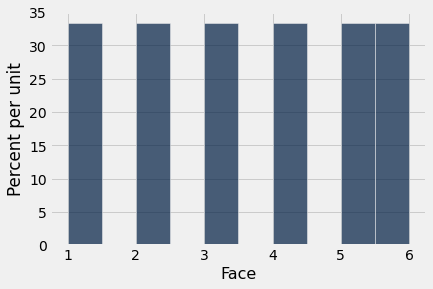

In [12]:
die.hist()#1/6에 해당 되는 값으로 히스토 그램을 구할 수 있음.

In [13]:
roll_bins=np.arange(0.5,6.6,1)

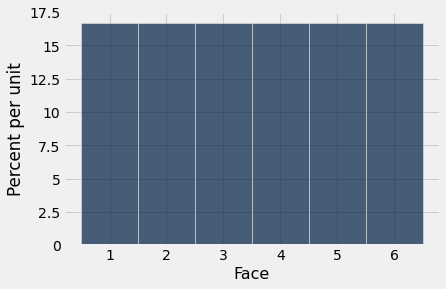

In [14]:
die.hist(bins=roll_bins) # 값이 깔끔하게 나옴

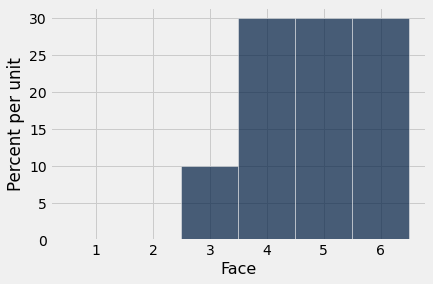

In [17]:
die.sample(10).hist(bins=roll_bins)# 10번 던진것의 히스토그램

## **Large Random Samples**

In [18]:
united # 항공편

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


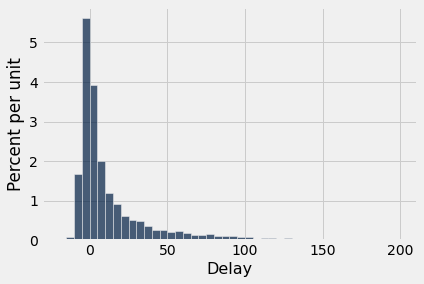

In [19]:
united_bins=np.arange(-20,201,5)
united.hist('Delay',bins=united_bins)

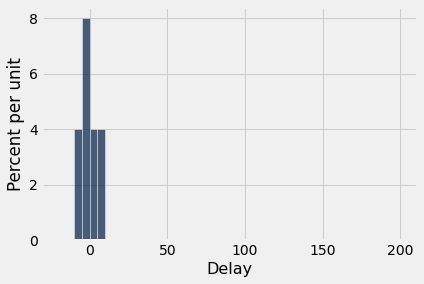

In [21]:
united.sample(10).hist('Delay',bins=united_bins)

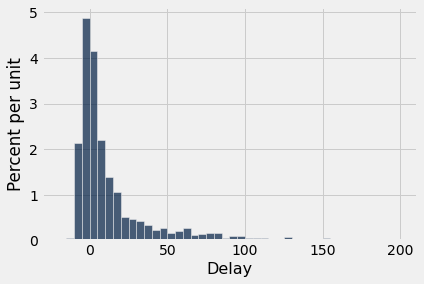

In [22]:
united.sample(1000).hist('Delay',bins=united_bins)

## **Statistics**

In [23]:
united.show(3)

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3


In [24]:
np.median(united.column('Delay'))

2.0

In [25]:
np.median(united.sample(10).column('Delay'))

1.5

In [26]:
np.median(united.sample(1000).column('Delay'))

2.0

## **Probability & Empirical Distribution of a Statistic**

In [32]:
def sample_median(size):
   return np.median(united.sample(size).column('Delay'))

In [33]:
sample_median(10)

-2.0

In [34]:
sample_median(100)

4.0

In [35]:
sample_median(1000)

2.0

In [36]:
num_simulations=2000 #샘플링을 2000번

In [37]:
sample_medians=make_array()

for i in np.arange(num_simulations):
  new_median=sample_median(10)
  sample_medians=np.append(sample_medians,new_median)

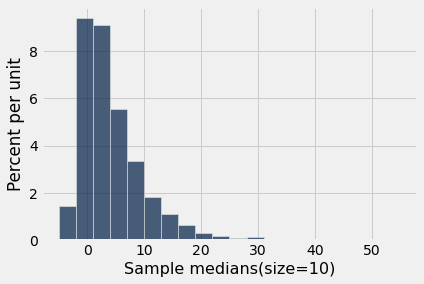

In [38]:
Table().with_column('Sample medians(size=10)',sample_medians).hist(bins=20)

### Empirical Distributions of a Statistic (Overlayed)

In [39]:
sample_medians_10 = make_array()#10개를 뽑은것
sample_medians_100 = make_array()#100
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [40]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

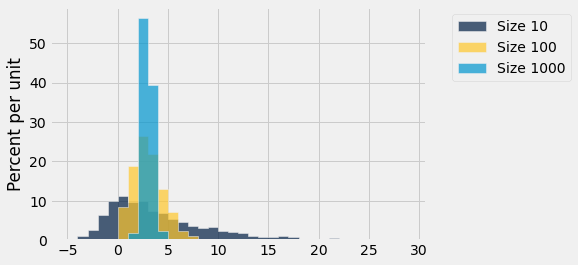

In [41]:
sample_medians.hist(bins = np.arange(-5, 30))

## **Swain vs. Alabama**

In [42]:
population_proportions=make_array(.26,.74)
population_proportions

array([ 0.26,  0.74])

In [43]:
sample_proportions(100,population_proportions)

array([ 0.24,  0.76])

In [44]:
def panel_proportion():
  return sample_proportions(100,population_proportions).item(0)

In [45]:
panel_proportion()

0.27

In [50]:
panels = make_array()
for i in np.arange(10000):
  new_panel = panel_proportion() * 100
  panels = np.append(panels, new_panel)

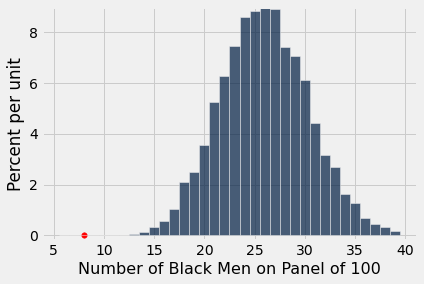

In [51]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels #panel 10000명을 뽑았을 때 실제 흑인은 몇 명인가
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## **Mendel and Pea Flowers**

In [52]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples=709/929
observed_purples

0.7631862217438106

In [53]:
predicted_proportions=make_array(.75,.25)
sample_proportions(929,predicted_proportions)

array([ 0.72981701,  0.27018299])

In [54]:
def purple_flowers():
  return sample_proportions(929,predicted_proportions).item(0)*100

In [55]:
purple_flowers()

75.56512378902045

In [60]:
purples = make_array()

for i in np.arange(10000):
  new_purple = purple_flowers()
  purples = np.append(purples, new_purple)

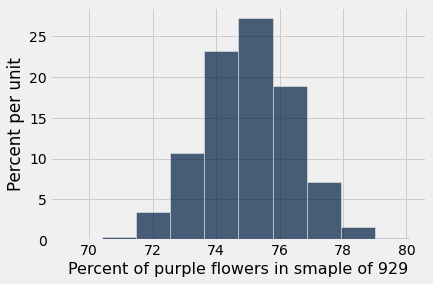

In [61]:
Table().with_column(
    'Percent of purple flowers in smaple of 929',
    purples
).hist()

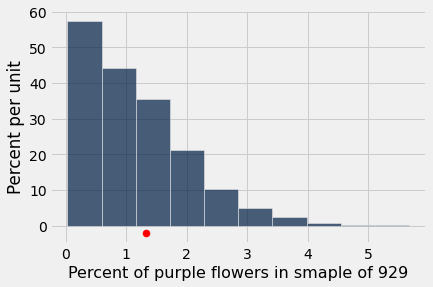

In [62]:
Table().with_column(
    'Percent of purple flowers in smaple of 929',
    abs(purples-75)
).hist()
plots.scatter(abs(observed_purples * 100 - 75), -0.02, color='red',s=50);